## Tense Lens 🔍

#### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=400, include_numbers=False, background_color='white')

#### Import Dataset

In [4]:
texts_df = pd.read_csv('English Tense Classification.csv')
texts_df.head(3)

,Sentence,Label
0,"By 2050, AI architects will have designed self...",3
1,"In the future, sustainable transportation opti...",3
2,China has been actively involved in peacekeepi...,1


## Dataframe Properties

#### Shape

In [5]:
texts_df.shape

(12000, 2)

#### Columns

In [6]:
texts_df.columns

Index(['Sentence', 'Label'], dtype='object')

#### Dataframe Info

In [7]:
texts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  12000 non-null  object
 1   Label     12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


#### Uniques

In [8]:
texts_df['Label'].unique()

array([3, 1, 2], dtype=int64)

#### Creating Tense Feature

In [9]:
texts_df['Tense'] = texts_df['Label'].apply(lambda x: 'Present' if x == 1 else ('Past' if x == 2 else 'Future'))

In [10]:
texts_df.sample(5)

,Sentence,Label,Tense
10707,Construction projects have utilized recycled c...,1,Present
8550,Ethical hackers are conducting security assess...,1,Present
4910,Medical teams are developing strategies to enh...,1,Present
7446,Ethical hackers are conducting regular securit...,1,Present
2224,Security analysts are implementing security co...,1,Present


## EDA

#### Word Clouds

In [11]:
texts_df['Sentence'] = texts_df['Sentence'].apply(lambda x: x + ' ')

In [12]:
text = texts_df['Sentence'].sum()

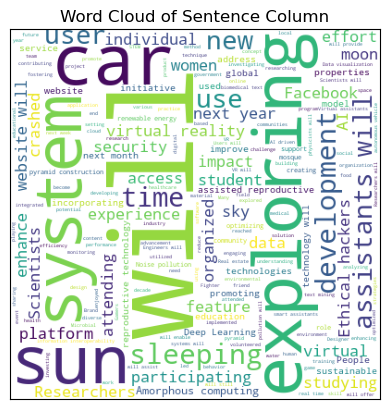

In [13]:
plt.imshow(wc.generate(text))
plt.title('Word Cloud of Sentence Column')
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.show()

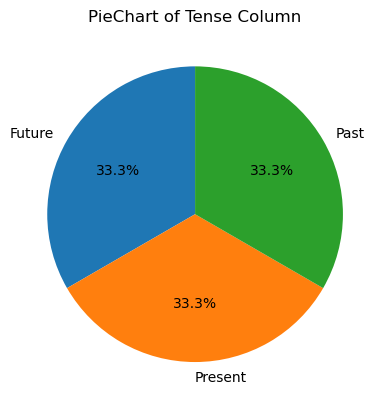

In [14]:
col_dict = dict(texts_df['Tense'].value_counts())
plt.pie(x = col_dict.values(), labels=col_dict.keys(), autopct='%1.1f%%', startangle=90)
plt.title('PieChart of Tense Column')
plt.show()

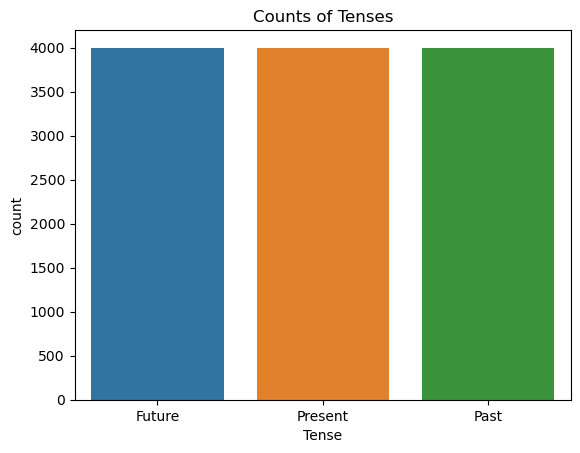

In [15]:
sns.countplot(x = 'Tense', data = texts_df)
plt.title('Counts of Tenses')
plt.show()

## Data Splitting

In [16]:
X = texts_df['Sentence']
Y = texts_df['Label']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((9600,), (9600,))

## Model Selection

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

models = {
    'log_reg': LogisticRegression(),
    'svm': SVC(),
    'knn': KNeighborsClassifier(),
    'dec_tree': DecisionTreeClassifier(),
    'mnb': MultinomialNB(),
    'ran_forest': RandomForestClassifier(),
    'ex_trees': ExtraTreesClassifier(),
    'gbm': GradientBoostingClassifier(),
}

#### Cross Validations

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

cv_df = pd.DataFrame(index=models.keys(), columns=['CVs', 'Accuracy'])

for i in models.keys():
    pipe = Pipeline(steps=[('cv', CountVectorizer(stop_words='english')), (f'{i}', models[i])])
    scores = cross_val_score(pipe, X, Y, cv = 5)
    cv_df.loc[i, 'CVs'] = scores
    cv_df.loc[i, 'Accuracy'] = scores.mean()
    print(f'{i} is cross validated ...!')

log_reg is cross validated ...!
svm is cross validated ...!
knn is cross validated ...!
dec_tree is cross validated ...!
mnb is cross validated ...!
ran_forest is cross validated ...!
ex_trees is cross validated ...!
gbm is cross validated ...!


In [20]:
cv_df.sort_values(by = 'Accuracy', ascending=False)

,CVs,Accuracy
log_reg,"[0.96125, 0.9625, 0.9566666666666667, 0.955833...",0.959833
svm,"[0.9608333333333333, 0.9629166666666666, 0.956...",0.958833
ex_trees,"[0.9545833333333333, 0.94875, 0.94291666666666...",0.946083
mnb,"[0.945, 0.9479166666666666, 0.9366666666666666...",0.940917
ran_forest,"[0.9479166666666666, 0.9391666666666667, 0.938...",0.94
dec_tree,"[0.9225, 0.92125, 0.9179166666666667, 0.913333...",0.918333
gbm,"[0.8558333333333333, 0.85125, 0.85625, 0.84458...",0.843083
knn,"[0.8279166666666666, 0.8066666666666666, 0.799...",0.804667


## Model Building

In [21]:
model = Pipeline(steps=[('cv', CountVectorizer(stop_words='english')), ('log_reg', LogisticRegression())])

model.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('log_reg', LogisticRegression())])

## Model Evaluation

In [22]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_test)

print('Accuracy: ', model.score(X_test, y_test))
print('Precision: ', precision_score(y_test, y_pred, average='micro'))
print('Recall: ', recall_score(y_test, y_pred,average='macro'))

Accuracy:  0.9625
Precision:  0.9625
Recall:  0.9627360742502676


## Model Prediction

In [23]:
texts_df.sample(5)

,Sentence,Label,Tense
4067,Surgeons are performing organ transplants to a...,1,Present
7323,We were sleeping on a bed of straw in the barn.,2,Past
5396,They observed the formation of a planetary sys...,2,Past
4039,She had organized a fundraiser to provide clea...,2,Past
9570,Governments will be implementing stricter regu...,3,Future


In [24]:
prediction = model.predict([texts_df['Sentence'][4067]])

if prediction == 1:
    print('Present')
elif prediction == 2:
    print('Past')
else:
    print('Future')

Present


In [25]:
prediction = model.predict([texts_df['Sentence'][7323]])

if prediction == 1:
    print('Present')
elif prediction == 2:
    print('Past')
else:
    print('Future')

Past


In [26]:
prediction = model.predict([texts_df['Sentence'][9570]])

if prediction == 1:
    print('Present')
elif prediction == 2:
    print('Past')
else:
    print('Future')

Future


## Model Saving

In [ ]:
import joblib
model_testdata = {'model':model, 'test_data': X_test}

joblib.dump(model_testdata, 'model_testdata.joblib')